# Making a simple result that might be expressed using a table into a figure

Tables are sometimes essential, e.g. if you need to record lots of numbers and the relationships between them. However, if the takeaway message of your paper is conveyed solely via referring to numbers in a table, consider turning that into figure 

(And it goes without saying that tables are terrible things to show during talks)

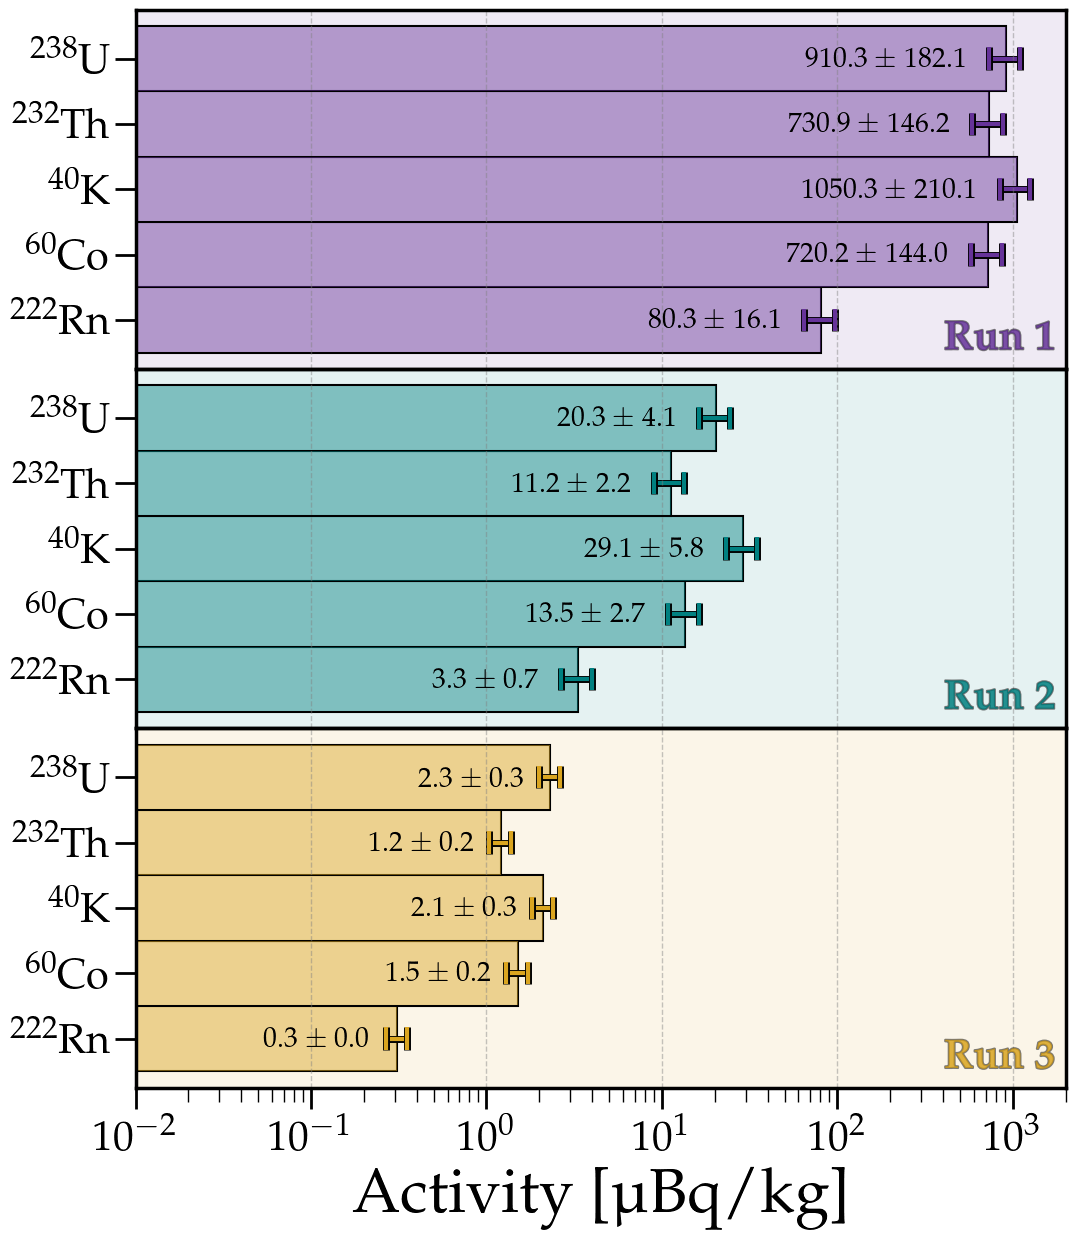

In [21]:
from numpy import *
import matplotlib.pyplot as plt
import matplotlib
from numpy import random
import matplotlib.patheffects as pe

plt.style.use('sty.mplstyle')

fig = plt.figure(figsize=(12,14))
gs = fig.add_gridspec(3, hspace=0)
ax1,ax2,ax3 = gs.subplots(sharex=True, sharey=True)

A_max = 200.0
n_iso = 5

Names = ['$^{238}$U','$^{232}$Th','$^{40}$K',r'$^{60}$Co','$^{222}$Rn']

Run1 = array([910.3,730.9,1050.3,720.2,80.3])
Run1_err = Run1/5

Run2 = array([20.3,11.2,29.1,13.5,3.3])
Run2_err = Run2/5

Run3 =  array([2.3,1.2,2.1,1.5,0.3])
Run3_err = Run3/7


cols = ['rebeccapurple','teal','goldenrod']

for ax,data,data_err,col in zip([ax1,ax2,ax3],[Run1,Run2,Run3],[Run1_err,Run2_err,Run3_err],cols):
    ax.barh(flipud(Names), flipud(data), left=1e-2, align='center', height=1,edgecolor='k',facecolor='w',lw=1.5,zorder=-10,alpha=1)
    ax.barh(flipud(Names), flipud(data), left=1e-2, xerr=flipud(data_err),align='center', height=0.98,facecolor=col,lw=0,zorder=-10,alpha=0.5,
            error_kw=dict(markeredgewidth=3,markeredgecolor='k',solid_joinstyle='round',capsize=8,elinewidth=3, ecolor=col,path_effects=[pe.Stroke(linewidth=5, foreground='k'), pe.Normal()]))
    ax.patch.set_facecolor(col)
    ax.patch.set_alpha(0.1)

ax3.set_xscale('log')
ax3.set_xlim([1e-2,2e3])

t_shift = [0.01,0.01,0.01,0.0,0.0]
for i in range(0,len(Run1)):
    ax1.text(Run1[i]-2*Run1_err[i],4-i-t_shift[i],r"%.1f $\pm$ %.1f" % (Run1[i],Run1_err[i]),va='center',ha='right',fontsize=20)
    ax2.text(Run2[i]-2*Run2_err[i],4-i-t_shift[i],r"%.1f $\pm$ %.1f" % (Run2[i],Run2_err[i]),va='center',ha='right',fontsize=20)
    ax3.text(Run3[i]-2*Run3_err[i],4-i-t_shift[i],r"%.1f $\pm$ %.1f" % (Run3[i],Run3_err[i]),va='center',ha='right',fontsize=20)

locmaj = matplotlib.ticker.LogLocator(base=10.0, subs=(1.0, ), numticks=50)
locmin = matplotlib.ticker.LogLocator(base=10.0, subs=arange(2, 10)*.1,numticks=100)
ax3.xaxis.set_major_locator(locmaj)
ax3.xaxis.set_minor_locator(locmin)

ax1.xaxis.grid(True, linestyle='--', which='major',color='grey', alpha=.45)
ax2.xaxis.grid(True, linestyle='--', which='major',color='grey', alpha=.45)
ax3.xaxis.grid(True, linestyle='--', which='major',color='grey', alpha=.45)

ax1.tick_params(which='both',right=False,tickdir='out',top=False,bottom=False)
ax2.tick_params(which='both',right=False,tickdir='out',top=False,bottom=False)
ax3.tick_params(which='both',right=False,tickdir='out',top=False)

ax1.text(1.75e3,-0.45,r'{\bf Run 1}',fontsize=30,alpha=0.7,color=cols[0],path_effects=[pe.Stroke(linewidth=1.5, foreground='k',alpha=0.5), pe.Normal()],ha='right')
ax2.text(1.75e3,-0.45,r'{\bf Run 2}',fontsize=30,alpha=0.7,color=cols[1],path_effects=[pe.Stroke(linewidth=1.5, foreground='k',alpha=0.5), pe.Normal()],ha='right')
ax3.text(1.75e3,-0.45,r'{\bf Run 3}',fontsize=30,alpha=0.7,color=cols[2],path_effects=[pe.Stroke(linewidth=1.5, foreground='k',alpha=0.5), pe.Normal()],ha='right')

plt.xlabel(r'Activity [\textmu Bq/kg]')

plt.savefig('../plots/Table.pdf',transparent=False,bbox_inches='tight')
plt.savefig('../plots/plots_png/Table.png',transparent=False,bbox_inches='tight')